# Social Media Analytics - Project

In [0]:
#Packages to install
!pip install emot
!pip install stats
!sudo apt-get install graphviz

     |████████████████████████████████| 133kB 6.0MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-cp36-none-any.whl size=24279 sha256=ae06aa9f87118bd282047eeacc39e070a64c8a6a41961598a77c599ab2fecc64
  Stored in directory: /root/.cache/pip/wheels/1f/64/c9/da1748f4ce76935afc665178ead2217b90147bac5ca096aa56
Successfully built stats
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [0]:
%matplotlib inline
from operator import itemgetter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import math
import tweepy
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from collections import Counter
import json
import numbers
import re
import os.path
import datetime
from tweepy import OAuthHandler, Stream, StreamListener
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import stats

pd.options.display.max_colwidth = 400
pd.options.display.max_rows = 25
pd.options.display.max_columns = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Load database
db = pd.read_csv("/content/QAnonRidotto.csv")
db.drop("Unnamed: 0",axis=1,inplace=True)
db.head(1)

,id,User,original_text,hashtags,mentions,Follower,Following,retweeted_user,quoted_user,replied_user,text
0,1268545440913424385,Amynicole1005,RT @M2Madness: The MSM wants you to forget about them saying this before the riots started...\n\nEnemy of the People... #QAnon H/t Anon https…,['QAnon'],['M2Madness'],616,872,M2Madness,NaN,NaN,the msm wants you to forget about them saying this before the riots started enemy of the people qanon h t anon


## Tweets collection
[_](https://github.com/lorenzofamiglini/Social-Media-Analytics/blob/master/Progetto_Social_Media_tweepy_stream.ipynb)

[TweetObject doc.](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)

Tweets have been collected in the 24 hours after George Floyd's funeral, indirectly acting as a catalyst event.

In [0]:
#Authentication (https://developer.twitter.com/en/apps/16155617)
secret = pd.read_csv("/Users/riccardocervero/Desktop/DataScience/Materie/Social Media Analytics/secret.csv",header=None)
consumer_key = secret.loc[0][1]
consumer_key_secret = secret.loc[1][1]
access_token = secret.loc[2][1]
access_token_secret = secret.loc[3][1]
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [0]:
num_max = 50000
file = "/Users/riccardocervero/Desktop/DataScience/Materie/Social Media Analytics/QAnonTweet.txt"

class StdOutListener(StreamListener):
    ''' Handles data received from the stream. '''
    
    def __init__(self, api=None):
        super(StdOutListener, self).__init__()
        self.count = 37797
        self.file = open(file, "a")
 
    def on_status(self, status):
        tweet = json.dumps(status._json)
        self.file.write(tweet + '\n')
        self.count += 1
        if self.count <= num_max:
            print(f'{self.count}\r', end="")
            return True
        else:
            return False
            self.file.close()
 
    def on_error(self, status_code):
        print(status_code)
        attempts = 0
        if status_code in [420, 500, 502, 503, 504]:
            attempts = attempts + 1
            time.sleep(450)
            print("Timeout in seconds: ", attempts * 1800)
            return False
        
        
text_query = ["WWG1WGA", "QAnon", "qanon", "qAnon","WhereWeGoOneWeGoAll","wherewegoonewegoall",
             "WWG1WGA_WORLDWIDE","WWG1WGAWORLDWIDE","GreatAwakening","GreatAwakeningWorldwide",
              "TheGreatAwakeningWorldwide","QArmy","QAnonusa", "qanonusa", "qAnonusa","QAnonUSA", "qanonUSA", "qAnonUSA",
              "QAnonUsa", "qanonUsa", "qAnonUsa","QSees","Qknows","QKNOWS","QSEES","QanonEurope",
              "QAnonEurope","qanoneurope"]
hashtag_query = ["#" + s for s in text_query]
search_query = list(set(text_query) | set(hashtag_query))
stream = tweepy.Stream(auth=api.auth, listener=StdOutListener(), tweet_mode='extended')

In [0]:
while True:
    try:
        stream.filter(track=[i for i in search_query],languages=["en"])
    except BaseException:
        print("An exception occured!")
        continue

In [0]:
l = []
def tweet_to_dataframe(file):
    with open(file, "r") as tweets_file:
        for line in tweets_file:
            t = json.loads(line)
            l.append(t)
    return pd.DataFrame(l)

db = tweet_to_dataframe(file)

In [0]:
db.tail(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries
50006,None,None,Thu Jun 04 22:58:55 +0000 2020,NaN,"{'hashtags': [{'text': 'wwg1wga', 'indices': [52, 60]}, {'text': 'qanon', 'indices': [61, 67]}, {'text': 'TheGreatAwakening', 'indices': [92, 110]}], 'urls': [], 'user_mentions': [{'screen_name': 'MySherrie6', 'name': 'Loverly', 'id': 2513907421, 'id_str': '2513907421', 'indices': [3, 14]}, {'screen_name': 'intheMatrixxx', 'name': ']intheMatrixxx[', 'id': 940430173517811714, 'id_str': '9404301...","{'media': [{'id': 1268606565302571009, 'id_str': '1268606565302571009', 'indices': [111, 134], 'media_url': 'http://pbs.twimg.com/media/EZr-8ySWkAEQcAJ.png', 'media_url_https': 'https://pbs.twimg.com/media/EZr-8ySWkAEQcAJ.png', 'url': 'https://t.co/z9WBsA6j5t', 'display_url': 'pic.twitter.com/z9WBsA6j5t', 'expanded_url': 'https://twitter.com/MySherrie6/status/1268606590082592777/photo/1', 'typ...",NaN,0,False,low,None,1268678650846744576,1268678650846744576,None,NaN,None,NaN,None,False,en,None,False,0,NaN,NaN,NaN,NaN,0,0,False,"{'created_at': 'Thu Jun 04 18:12:35 +0000 2020', 'id': 1268606590082592777, 'id_str': '1268606590082592777', 'text': '@intheMatrixxx @thehill Q sent me! #wwg1wga #qanon Follow me as we track #TheGreatAwakening https://t.co/z9WBsA6j5t', 'display_text_range': [24, 94], 'source': '<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_...","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @MySherrie6: @intheMatrixxx @thehill Q sent me! #wwg1wga #qanon Follow me as we track #TheGreatAwakening https://t.co/z9WBsA6j5t,1591311535928,False,"{'id': 874755404, 'id_str': '874755404', 'name': 'Simba', 'screen_name': 'joymarva', 'location': 'Grand Rapids, MI', 'url': None, 'description': 'I Love God, my Family and my Country!🇺🇲 I support President Donald J Trump and trust Q', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 165, 'friends_count': 247, 'listed_count': 0, 'favourites_count': 21359, 's...",NaN


In [0]:
#Export
db.to_csv("/Users/riccardocervero/Desktop/QAnonTweet.csv")

In [0]:
#Load tweet db
db = pd.read_csv("/Users/riccardocervero/Desktop/QAnonTweet.csv")
db.drop("Unnamed: 0",axis=1,inplace=True)

## Pre-processing

In [0]:
print("Observation: ",len(db))
print("Number of columns: ",len(db.columns))

Observation:  50007
Number of columns:  37


In [0]:
#Check if there are costant columns 
def costant(db):
    c = []
    for col in db.columns:
        if len(db[col].unique())==1:
            print(col,":",db[col].unique())
            c.append(col)
    return c

to_remove = costant(db)

contributors : [nan]
favorite_count : [0]
favorited : [False]
filter_level : ['low']
lang : ['en']
quote_count : [0]
reply_count : [0]
retweet_count : [0]
retweeted : [False]


In [0]:
db.drop([k for k in to_remove],axis=1,inplace=True)
len(db.columns)

28

In [0]:
#Check "coordinates" values
print([e for e in db.coordinates.unique()])
print(len(db[db.coordinates=="{'type': 'Point', 'coordinates': [-74.0064, 40.7142]}"]))
print(len(db[db.coordinates=="{'type': 'Point', 'coordinates': [-111.4926835, 33.1030516]}"]))

[nan, "{'type': 'Point', 'coordinates': [-74.0064, 40.7142]}", "{'type': 'Point', 'coordinates': [-111.4926835, 33.1030516]}"]
1
1


In [0]:
db.drop("coordinates",axis=1,inplace=True)
db.drop("geo",axis=1,inplace=True)
len(db.columns)

26

In [0]:
#Check "withheld_in_countries"
print([e for e in db.withheld_in_countries.unique()])
print(len(db[db.withheld_in_countries=="['DE']"])/len(db))

[nan, "['DE']"]
0.0009198712180294758


In [0]:
db.drop("withheld_in_countries",axis=1,inplace=True)
len(db.columns)

25

In [0]:
#Check "possibly_sensitive"
print([e for e in db.possibly_sensitive.unique()])
print(len(db[db.possibly_sensitive.isna()])/len(db))
print(len(db[db.possibly_sensitive==False])/len(db))
print(len(db[db.possibly_sensitive==True])/len(db))

[nan, False, True]
0.6641270222168897
0.3269342292079109
0.008938748575199471


In [0]:
db.drop("possibly_sensitive",axis=1,inplace=True)
len(db.columns)

24

In [0]:
#Remove othe useless variable
to_remove = ["quoted_status_permalink","timestamp_ms","display_text_range","id_str",
           "in_reply_to_status_id_str","in_reply_to_user_id_str","quoted_status_id_str",
          "in_reply_to_user_id","extended_entities","source"
            "created_at" #We don't have most of time zone values
            ]

db.drop([k for k in to_remove],axis=1,inplace=True)
len(db.columns)

13

In [0]:
#Check "place"
print(len(db.place.unique()))
print("% not null place values:",len(db[pd.notna(db.place)])/len(db))

75
% not null place values: 0.002679624852520647


In [0]:
db.drop("place",axis=1,inplace=True)
len(db.columns)

12


In [0]:
#Check % of "quoted" and retweet
print("% Quoted Tweet:",len(db[db.is_quote_status==True])/len(db))
print("% Retweeted Tweet:",1-len(db[db.retweeted_status.isna()])/len(db))
print("Number of tweet both quoted and retweet:",len(db[(db.is_quote_status==True) & (pd.notna(db.retweeted_status))]))
print("% Replies to Tweet:",len(db[pd.notna(db.in_reply_to_status_id)])/len(db))

% Quoted Tweet: 0.25558421820945065
% Retweeted Tweet: 0.7617733517307577
Number of tweet both quoted and retweet: 8804
% Replies to Tweet: 0.08442818005479233


In [0]:
db.drop("is_quote_status",axis=1,inplace=True)

### Full Text 

In [0]:
#Substitute "extend_tweet" with "text"
print(len(db[db.truncated==True]))
print(len(db[pd.notna(db.extended_tweet)]))
db.drop("truncated",axis=1,inplace=True)

6370
6370


In [0]:
def full_text(x):
    x = ast.literal_eval(x)
    return(x["full_text"])

print(db.loc[2]['text'],"\n")
print(full_text(db.loc[2]['extended_tweet']))

Notice the framing: you are either a believer or not a believer; there is an "authority model" of truth sources, pi… https://t.co/xR6CERfCS4 

Notice the framing: you are either a believer or not a believer; there is an "authority model" of truth sources, pick your external authority. Thinking for yourself is not an option to be considered. Indeed, it is implicitly derided as "backtracking" here. https://t.co/9eeRmQA1DK


In [0]:
t = []
for i in range(len(db)):
    if pd.notna(db.loc[i]["extended_tweet"]):
        t.append(full_text(db.loc[i]["extended_tweet"]))
    else:
        t.append(db.loc[i]['text'])

In [0]:
db.text = t
print(db.loc[2]['text'],"\n")
print(full_text(db.loc[2]['extended_tweet']))

Notice the framing: you are either a believer or not a believer; there is an "authority model" of truth sources, pick your external authority. Thinking for yourself is not an option to be considered. Indeed, it is implicitly derided as "backtracking" here. https://t.co/9eeRmQA1DK 

Notice the framing: you are either a believer or not a believer; there is an "authority model" of truth sources, pick your external authority. Thinking for yourself is not an option to be considered. Indeed, it is implicitly derided as "backtracking" here. https://t.co/9eeRmQA1DK


In [0]:
db.drop("extended_tweet",axis=1,inplace=True)
len(db.columns)

9

### Entities

Entities values are a set of:
- Hashtags
- URLs
- Mentions
- Symbols

In [0]:
db.loc[5]['entities']

"{'hashtags': [{'text': 'OBAMAGATE', 'indices': [20, 30]}, {'text': 'QANON', 'indices': [119, 125]}, {'text': 'WWG1WGA', 'indices': [126, 134]}], 'urls': [], 'user_mentions': [{'screen_name': 'ThanQTrump', 'name': 'Facts over Feelings', 'id': 935571037441445888, 'id_str': '935571037441445888', 'indices': [3, 14]}], 'symbols': []}"

#### Hashtags

In [0]:
def extract_hashtags(x):
    x = ast.literal_eval(x)
    a = x['hashtags']
    return [a[i]['text'] for i in range(len(a))]

extract_hashtags(db.loc[5]['entities'])

['OBAMAGATE', 'QANON', 'WWG1WGA']

In [0]:
h = []
for i in range(len(db)):
    h.append(extract_hashtags(db.loc[i]['entities']))
db['hashtags'] = h

#### Hashtags Analysis

In [0]:
hlist = [j for i in db.hashtags for j in i]
#Normalize
hlist = [e.lower() for e in hlist]
hdb = pd.DataFrame.from_dict(dict(Counter(hlist)), orient='index',columns=['Freq'])
hdb = hdb.sort_values('Freq',ascending=False)
hdb.reset_index(inplace=True)
hdb.columns = ['Hashtag','Freq']
#Top 20
hdb.iloc[0:20]

,Hashtag,Freq
0,qanon,15534
1,wwg1wga,8534
2,fakenews,2352
3,wearethenewsnow,1364
4,greatawakening,1353
5,obamagate,1229
6,wwg1wgaworldwide,1087
7,thegreatawakening,1053
8,factsmatter,919
9,wakeupamerica,806


Text(0.5, 1.0, 'Top 25 Hashtags')

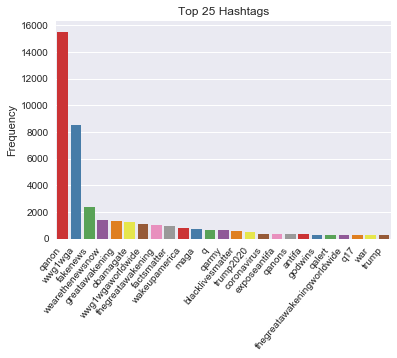

In [0]:
#Plot
hdb_ = hdb.iloc[0:25]
sns.set(style="darkgrid")
hplot = sns.barplot(x="Hashtag", y="Freq", data=hdb_,palette="Set1")
plt.xticks(
    rotation=50, 
    horizontalalignment='right'  
)
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Top 25 Hashtags")

Text(0.5, 1.0, 'Hashtags LogFrequency')

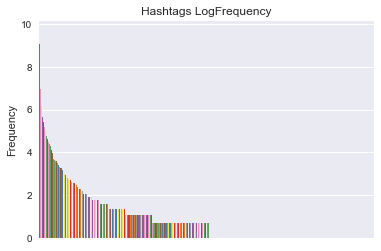

In [0]:
#LogDistrobution
sns.barplot(x="Hashtag", y=np.log(hdb.Freq), data=hdb,palette="Set1")
plt.xticks([], [])
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Hashtags LogFrequency")

#### Mentions

In [0]:
def extract_mentions(x):
    x = ast.literal_eval(x)
    b = x['user_mentions']
    return [b[i]['screen_name'] for i in range(len(b))]

extract_mentions(db.loc[20000]['entities'])

['girlsreallyrule', 'TheJusticeDept']

In [0]:
m = []
for i in range(len(db)):
    m.append(extract_mentions(db.loc[i]['entities']))
db['mentions'] = m

#### Mentions Analysis

In [0]:
mlist = [j for i in db.mentions for j in i]
mdb = pd.DataFrame.from_dict(dict(Counter(mlist)), orient='index',columns=['Freq'])
mdb = mdb.sort_values('Freq',ascending=False)
mdb.reset_index(inplace=True)
mdb.columns = ['Mention','Freq']
#Top 20
mdb.iloc[0:20]

,Mention,Freq
0,honest2gosh,2760
1,cjtruth,2291
2,JuliansRum,2108
3,realDonaldTrump,1969
4,M2Madness,1887
5,Inevitable_ET,1696
6,Qanon76,1341
7,SheepKnowMore,1096
8,EyesOnQ,933
9,PayRespectsF,927


Text(0.5, 1.0, 'Top 25 Mentions')

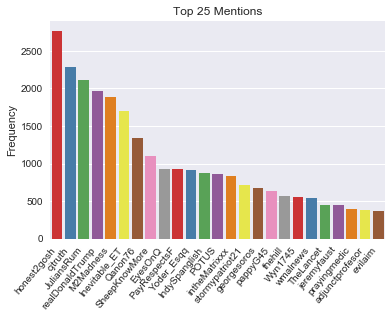

In [0]:
#Plot
mdb_ = mdb.iloc[0:25]
sns.barplot(x="Mention", y="Freq", data=mdb_,palette="Set1")
plt.xticks(
    rotation=50, 
    horizontalalignment='right'  
)
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Top 25 Mentions")

Text(0.5, 1.0, 'Mentions LogFrequency')

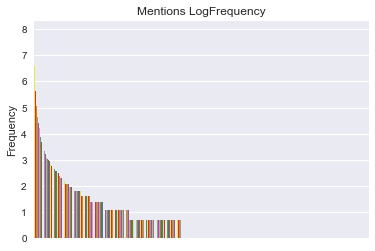

In [0]:
#LogDistrobution
sns.barplot(x="Mention", y=np.log(mdb.Freq), data=mdb,palette="Set1")
plt.xticks([], [])
plt.xlabel("")
plt.ylabel("Frequency")
plt.title("Mentions LogFrequency")

In [0]:
db.drop("entities",axis=1,inplace=True)
len(db.columns)

10

### Retweet

In [0]:
def extract_user_retweeted(x):
    x = ast.literal_eval(x)
    return x['user']['screen_name']

extract_user_retweeted(db.loc[0]["retweeted_status"])

'M2Madness'

In [0]:
r = []
for i in range(len(db)):
    if pd.notna(db.loc[i]['retweeted_status']):
        r.append(extract_user_retweeted(db.loc[i]['retweeted_status']))
    else:
        r.append(np.nan)
db['retweeted_user'] = r

In [0]:
db.drop("retweeted_status",axis=1,inplace=True)
len(db.columns)

10

### Quotes

In [0]:
def extract_user_quoted(x):
    x = ast.literal_eval(x)
    return x['user']['screen_name']

extract_user_quoted(db.loc[16]["quoted_status"])

'ThanQTrump'

In [0]:
q = []
for i in range(len(db)):
    if pd.notna(db.loc[i]['quoted_status']):
        q.append(extract_user_quoted(db.loc[i]['quoted_status']))
    else:
        q.append(np.nan)
db['quoted_user'] = q

In [0]:
db.drop(["quoted_status","quoted_status_id"],axis=1,inplace=True)
len(db.columns)

9

### Replies

In [0]:
db.drop(["in_reply_to_status_id"],axis=1,inplace=True)
db.rename(columns={'in_reply_to_screen_name':'replied_user'}, inplace=True)

### User

Interesting user's attributes are:
- screen_name (unique name)
- followers_count (followers)
- friends_count (following)

In [0]:
def get_data(x,d):
    x = ast.literal_eval(x)
    if d=="screen_name":
        return x['screen_name']
    elif d=="follower":
        return x['followers_count']
    elif d=="following":
        return x['friends_count']


print("Screen name:",get_data(db.loc[0]['user'],"screen_name"))
print("Number of follower:",get_data(db.loc[0]['user'],"follower"))
print("Number of following:",get_data(db.loc[0]['user'],"following"))

Screen name: Amynicole1005
Number of follower: 616
Number of following: 872


In [0]:
s = []
er = []
ing = []
for i in range(len(db)):
    s.append(get_data(db.loc[i]['user'],"screen_name"))
    er.append(get_data(db.loc[i]['user'],"follower"))
    ing.append(get_data(db.loc[i]['user'],"following"))
    
db['User'] = s
db['Follower'] = er
db['Following'] = ing

db.drop(["user"],axis=1,inplace=True)

In [0]:
db = db[['id','User','text','hashtags','mentions','Follower','Following','retweeted_user',
        'quoted_user','replied_user']]
db.head(1)

,id,User,text,hashtags,mentions,Follower,Following,retweeted_user,quoted_user,replied_user
0,1268545440913424385,Amynicole1005,RT @M2Madness: The MSM wants you to forget about them saying this before the riots started...\n\nEnemy of the People... #QAnon H/t Anon https…,['QAnon'],[M2Madness],616,872,M2Madness,NaN,NaN


#### Users Analysis

In [0]:
print("Number of users: ",len(db.User.unique()))
print("Number of mentioned user: ",len(db.mentions.unique()))
print("Number of user replied to: ",len(db.replied_user.unique()))
print("Number of quoted user: ",len(db.quoted_user.unique()))
total = set(db.User.unique())|set(mlist)|set(db.replied_user.unique())|set(db.quoted_user.unique())
print("Total number of users: ",len(total))
#Create interaction list
u_count = dict(Counter([i for i in db.User if pd.notna(i)]))
r_count = dict(Counter([i for i in db.replied_user if pd.notna(i)]))
q_count = dict(Counter([i for i in db.quoted_user if pd.notna(i)]))
m_count = [ast.literal_eval(i) for i in db.mentions]
m_count = dict(Counter([j for i in m_count for j in i]))
input=[u_count,r_count,q_count,m_count]
d = pd.DataFrame.from_dict(sum((Counter(dict(x)) for x in input),Counter()),orient="index",columns=['N. interactions'])
d.sort_values("N. interactions",ascending=False,inplace=True)
print("20 most interacting users:","\n")
display(d.iloc[0:20])

Number of users:  26770
Number of mentioned user:  6420
Number of user replied to:  2025
Number of quoted user:  1662
Total number of users:  28922
20 most interacting users: 



,N. interactions
honest2gosh,4007
cjtruth,2681
realDonaldTrump,2492
JuliansRum,2467
M2Madness,2287
Inevitable_ET,1773
Yoder_Esqq,1477
Qanon76,1392
SheepKnowMore,1245
PayRespectsF,1220


In this top 20 most interacting/mentioned users we can see famous ones like:
- Donald Trump, as [personal account](https://twitter.com/realDonaldTrump) and [official account](https://twitter.com/POTUS)
- [George Soros](https://twitter.com/georgesoros)

### Duplicates

In [0]:
#Check full duplicates
to_check = set(db.columns)-set(['hashtags','mentions'])
print("Number of duplicates:",len(db[db.duplicated(subset=[k for k in to_check],keep='last')]))
db.drop_duplicates(subset=[k for k in to_check],keep='last',inplace=True)
len(db)

Number of duplicates: 275


49732

In [0]:
print("Number of id duplicates:",len(db[db.duplicated(subset=["id"],keep='last')]))

Number of id duplicates: 0


In [0]:
db.to_csv("/Users/riccardocervero/Desktop/QAnonRidotto.csv")

### Text Preprocessing

In [0]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have","yep":"yes","ty":"thank you","rt":"retweet"}


def rem(x):
    for p in [".",",","!","?"]:
        x = str(x).replace(p," ")
    return x


def convert_emo(text):
    #Emojis into word
    for emot in UNICODE_EMO:
        text = text.replace(emot, " ".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    #Emoticons into word
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', " ".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

def rem_contractions(x):
    x = rem(x).split()
    new_text = []
    for word in x:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    return ' '.join([str(elem) for elem in new_text])

def text_preprocessing(x,remove_stop_word=False):
    cleaned = re.sub(r'http\S+', '', x)
    #Convert hashtags into words
    re.sub(r'#',"",cleaned)
    #Remove mentions for retweet
    cleaned = re.sub(r'RT @([^\s:]+):',"",cleaned)
    #Remove other mentions
    cleaned = re.sub(r'@([^\s:]+)',"",cleaned)
    cleaned = "".join([i for i in [s.lower() for s in cleaned]])
    cleaned = rem_contractions(cleaned)
    cleaned = convert_emo(cleaned)
    cleaned = re.sub("[^a-zA-Z]", ' ', cleaned) # remove punctuation, special characters and numbers
    if remove_stop_word:
        cleaned = " ".join([i for i in word_tokenize(cleaned) if i not in stop_words])
    return ' '.join(cleaned.split())

In [0]:
print("ORIGINAL TEXT:",db.text[12],"\n")
print("PREPROCESSED TEXT:",text_preprocessing(db.text[12]))

ORIGINAL TEXT: RT @Pat_Potvin: RT to inform
#MockingbirdMedia #GreatAwakening #WWG1WGAWORLDWIDE 

@Pat_Potvin @PatPatriot55 

PREPROCESSED TEXT: retweet to inform mockingbirdmedia greatawakening wwg wgaworldwide


In [0]:
db.rename(columns={'text':'original_text'}, inplace=True)
db['text'] = db.original_text.apply(text_preprocessing)

In [0]:
#Check duplicated texts
print("Total number of duplicated texts:",len(db[db.duplicated(subset=["text"],keep='last')]))
print("Number of unique duplicated texts:",len(db[db.duplicated(subset=["text"],keep='last')]['text'].unique()))
print("Portion of duplicated text among unique texts:",str(100*len(db[db.duplicated(subset=["text"],keep='last')]['text'].unique())/len(db['text'].unique()))+"%")

Total number of duplicated texts: 35855
Number of unique duplicated texts: 2889
Portion of duplicated text among unique texts: 20.818620739352887%


In [0]:
db.to_csv("/Users/riccardocervero/Desktop/QAnonRidotto.csv")

## Is Bot?

In [0]:
#Read bot database extracted by twitterbot library from R
bot = pd.read_csv("/content/bot.csv")
bot.drop("Unnamed: 0",axis=1,inplace=True)
bots = [e for e in bot[bot.prob_bot>=0.85]['screen_name']]
print("Number of bots:",len(bots))

Number of bots: 387


In [0]:
isbot = []
for u in db.User:
  if u in bots:
    isbot.append("1")
  else:
    isbot.append("0")
db['IsBot'] = isbot

In [0]:
print("Number of tweets by bot:",len(db[db.IsBot=="1"]))
print("Top 20 bot:","\n")
display(bot.loc[0:20][['screen_name','prob_bot']])

Number of tweets by bot: 840
Top 20 bot: 



,screen_name,prob_bot
0,Holmesdonna1,0.999726
1,Culmum1,0.998895
2,Nvania,0.998879
3,amars50,0.997957
4,Lonewolf2716,0.997685
5,angelataboo,0.997093
6,Smiler191,0.997069
7,jcpretorius,0.996966
8,AsilanaQAnon,0.996562
9,tachyonluxor,0.996129


______________________________________________________________________________________________________________________

## Interaction graph

[_](https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Interaction%20Network.ipynb)

In [0]:
#Function to extract interactions
def get_interactions(row):
    user = row["User"] 
    interactions = set() #Interactions are set of tuples
    #1)replies
    if pd.notna(row["replied_user"]):
      interactions.add((row["replied_user"],"r"))
    #2)retweets
    if pd.notna(row["retweeted_user"]):
      interactions.add((row["retweeted_user"],"g"))
    #3)quotes
    if pd.notna(row["quoted_user"]):
      interactions.add((row["quoted_user"],"b"))
    #3)mentions
    if pd.notna(row["mentions"]):
      for i in ast.literal_eval(row['mentions']):
        interactions.add((i,"orange"))
    # Discard auto-interactions
    interactions.discard((row["User"]))
    # Discard all not existing values
    interactions.discard((None, None))
    # Return user and interactions
    return user, interactions

#Function to draw interactions
def draw_interactions(db, plot = True, labels = False, prog="neato"):
  c = []
  c1 = []
  botnode = []
  #Initialize graph
  graph = nx.Graph()
  #Build graph
  for index, tweet in db.iterrows():
    user, interactions = get_interactions(tweet)
    user_name = user
    tweet_id = tweet["id"]
    for interaction in interactions:
        int_name = interaction[0]
        c.append(interaction[1])
        graph.add_edge(user_name, int_name)
        graph.add_node(user_name)
        if user_name in bots:
          botnode.append(user_name)
        graph.add_node(int_name)
  print("Original graph has",graph.number_of_nodes(),"nodes and",graph.number_of_edges(),"edges.")
  #Find the biggest connected component
  largest_subgraph = max((graph.subgraph(c) for c in nx.connected_components(graph)), key=len)
  botnode = set([n for n in botnode if n in largest_subgraph])
  notbot = set([n for n in largest_subgraph if n not in botnode])
  #Get degree
  d = dict(graph.degree)
  dbot = {k: v for k, v in d.items() if k in botnode}
  dnotbot = {k: v for k, v in d.items() if k in notbot}
  if plot:
    #pos = nx.spring_layout(largest_subgraph,k=10) #Default layout
    pos = nx.nx_pydot.graphviz_layout(largest_subgraph,prog=prog)
    plt.figure(figsize = (35,35))
    nx.draw(largest_subgraph,pos=pos,alpha=0)
    nx.draw_networkx_nodes(largest_subgraph,pos=pos,nodelist=botnode,node_size=[np.log(v*1000) for v in dbot.values()],node_shape="s",node_color="red")
    nx.draw_networkx_nodes(largest_subgraph,pos=pos,nodelist=notbot,node_size=[np.log(v*1000) for v in dnotbot.values()])
    nx.draw_networkx_edges(largest_subgraph,pos=pos,width=0.3,edge_color = c)
    plt.savefig('/content/graph.png')
    plt.show()
  return(largest_subgraph)

In [0]:
#Possible prog:'neato','dot','twopi','fdp','sfdp','circo'
g = draw_interactions(db,prog="sfdp")

Original graph has 30914 nodes and 65001 edges.


In [0]:
#Degree centrality
  graph_centrality = nx.degree_centrality(largest_subgraph)
  max_de = max(graph_centrality.items(), key=itemgetter(1))
  #Closeness centrality
  graph_closeness = nx.closeness_centrality(largest_subgraph)
  max_clo = max(graph_closeness.items(), key=itemgetter(1))
  #Normalized betweenness centrality 
  graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)
  max_bet = max(graph_betweenness.items(), key=itemgetter(1))
  #Highlight central nodes
  central_nodes = [max_de[0], max_clo[0], max_bet[0]]